In [274]:
## Utility and Data Wrangling
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

## Plotting and Viz
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import scipy.stats as stats

In [192]:
dataset = pd.read_csv('../data/20220408-171337_dataset.csv')

In [193]:
dfInsurance = dataset.copy()

In [4]:
dfInsurance.shape

(10270, 31)

In [5]:
dfInsurance.isna().sum()

Unnamed: 0                     0
cod_cust_id                    0
dt_fpy                         0
atr_cust_age                   0
dsc_edu_deg                   17
amt_gms                        0
atr_gla                        0
flg_children                   0
amt_cmv                        0
rt_cr                          0
amt_plob_motor                 0
amt_plob_household             0
amt_plob_health                0
amt_plob_life                  0
amt_plob_wcomp                 2
atr_edu_deg                    0
outlier_candidate           9555
amt_premium_total              2
atr_fpy_to_date                0
rt_plob_life                   2
rt_plob_household              2
rt_plob_motor                  2
rt_plob_health                 2
rt_plob_wcomp                  2
fe_bin_plob_motor              0
fe_bin_plob_life               0
fe_bin_plob_health             0
fe_bin_plob_wcomp              2
fe_bin_plob_household          0
fe_cmv_cr_quadrant_Type1       0
fe_cmv_cr_

In [15]:
dfInsurance.dtypes

Unnamed: 0                    int64
cod_cust_id                   int64
dt_fpy                        int64
atr_cust_age                  int64
dsc_edu_deg                  object
amt_gms                     float64
atr_gla                       int64
flg_children                  int64
amt_cmv                     float64
rt_cr                       float64
amt_plob_motor              float64
amt_plob_household          float64
amt_plob_health             float64
amt_plob_life               float64
amt_plob_wcomp              float64
atr_edu_deg                 float64
outlier_candidate            object
amt_premium_total           float64
atr_fpy_to_date             float64
rt_plob_life                float64
rt_plob_household           float64
rt_plob_motor               float64
rt_plob_health              float64
rt_plob_wcomp               float64
fe_bin_plob_motor            object
fe_bin_plob_life             object
fe_bin_plob_health           object
fe_bin_plob_wcomp           

In [194]:
dfInsurance['dt_fpy'] = dfInsurance['dt_fpy'].astype('int64')
dfInsurance['atr_cust_age'] = dfInsurance['atr_cust_age'].astype('int64')
dfInsurance['atr_gla'] = dfInsurance['atr_gla'].astype('int64')
dfInsurance['flg_children'] = dfInsurance['flg_children'].astype('int64')

#dfInsurance['dt_fpy'] = pd.to_datetime(dfInsurance['dt_fpy'], format='%Y')

dfInsurance.drop('Unnamed: 0', axis=1, inplace=True)

In [195]:
def interquartile_range(column):
    """Checks if data is 1.5 times the interquartile range greater than the third quartile (Q3) 
    or 1.5 times the interquartile range less than the first quartile (Q1)
    
    param column: a series or column from a dataset containing numerical data 
    output: returns the superior and inferior values where observations are below or above 1.5 times the interquartile range 
    """
    distance = 1.5 * (np.nanpercentile(column, 75) - np.nanpercentile(column, 25))
    lim_sup= distance + np.nanpercentile(column, 90)
    lim_inf= np.nanpercentile(column, 10) - distance
    
    return lim_sup, lim_inf


In [149]:
#negatives
dfInsurance.loc[(dfInsurance['amt_plob_motor'] < 0) | (dfInsurance['amt_plob_household'] < 0) | (dfInsurance['amt_plob_health'] < 0) | (dfInsurance['amt_plob_life'] < 0) | (dfInsurance['amt_plob_wcomp'] < 0)]
dfInsurance.loc[(dfInsurance['amt_plob_motor'] < 0)] # 1
dfInsurance.loc[(dfInsurance['amt_plob_household'] < 0)] # 1092
dfInsurance.loc[(dfInsurance['amt_plob_health'] < 0)] # 1
dfInsurance.loc[(dfInsurance['amt_plob_life'] < 0)] # 666
dfInsurance.loc[(dfInsurance['amt_plob_wcomp'] < 0)] # 926


,cod_cust_id,dt_fpy,atr_cust_age,dsc_edu_deg,amt_gms,atr_gla,flg_children,amt_cmv,rt_cr,amt_plob_motor,...,rt_plob_motor,rt_plob_health,rt_plob_wcomp,fe_bin_plob_motor,fe_bin_plob_life,fe_bin_plob_health,fe_bin_plob_wcomp,fe_bin_plob_household,fe_cmv_cr_quadrant_Type1,fe_cmv_cr_quadrant_Type2
28,29,1995,64,3 - BSc/MSc,7277.0,4,0,264.17,0.496325,301.28,...,0.524768,0.449470,-0.000192,B,NEGATIVES,A,NEGATIVES,G,Q2,Q3
29,30,1980,44,3 - BSc/MSc,5320.0,3,0,2.00,0.955454,524.21,...,0.864876,0.090578,-0.008249,A,H,C,NEGATIVES,F,Q2,Q4
30,31,1988,41,2 - High School,4295.0,4,1,427.76,0.190213,483.09,...,0.864034,0.164976,-0.009140,A,H,C,NEGATIVES,NEGATIVES,Q2,Q3
51,52,1982,50,3 - BSc/MSc,6467.0,4,1,-14714.08,25.360000,557.44,...,0.924444,0.049022,-0.014925,A,H,D,NEGATIVES,F,Q4,Q1
64,65,1982,43,3 - BSc/MSc,4587.0,3,0,-124.32,1.188979,452.53,...,0.861043,0.199616,-0.007820,A,F,B,NEGATIVES,NEGATIVES,Q1,Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10191,10218,1988,46,2 - High School,4555.0,1,1,500.55,0.192704,569.55,...,0.874885,0.057527,-0.018433,A,NEGATIVES,D,NEGATIVES,F,Q2,Q3
10196,10223,1977,49,2 - High School,4421.0,4,1,-10.32,0.974868,484.87,...,0.830086,0.141358,-0.000377,A,NEGATIVES,C,NEGATIVES,G,Q2,Q4
10202,10229,1994,53,2 - High School,3880.0,1,0,516.44,0.075347,529.99,...,0.905099,0.070223,-0.005123,A,H,D,NEGATIVES,G,Q2,Q3
10203,10230,1980,71,1 - Basic,7896.0,4,1,-28.22,1.005691,423.19,...,0.747963,0.227063,-0.007070,A,H,B,NEGATIVES,G,Q1,Q4


# Check data distribution

#### Customer Monetary Value

Text(0.5, 0.98, 'Gross Monthly Salary')

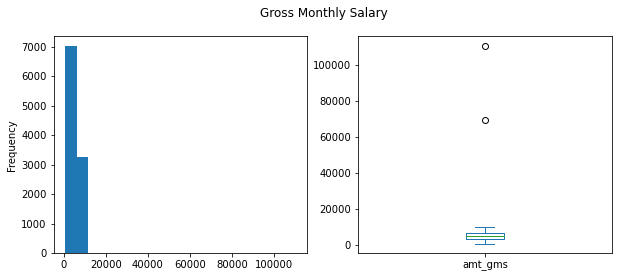

In [71]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
dfInsurance['amt_gms'].plot(kind='hist', bins=20, ax=axes[0])
dfInsurance['amt_gms'].plot(kind='box', ax=axes[1])
plt.suptitle("Gross Monthly Salary")


In [34]:
dfInsurance = dfInsurance.loc[dfInsurance['amt_gms'] < 60000]

#### Customer Monetary Value

Text(0.5, 0.98, 'Customer Monetary Value')

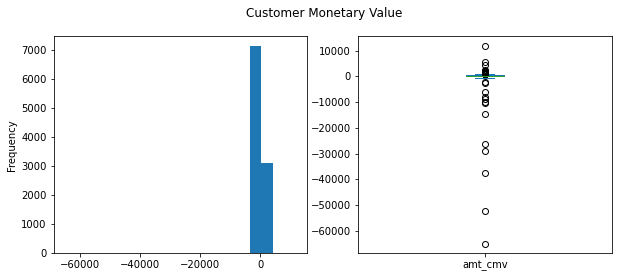

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
dfInsurance['amt_cmv'].plot(kind='hist', bins=20, ax=axes[0])
dfInsurance['amt_cmv'].plot(kind='box', ax=axes[1])
plt.suptitle("Customer Monetary Value")


In [215]:
dfInsurance['amt_cmv'].min()

-165680.424

##### Convert min value to 0

In [216]:
dfInsurance['test_feature'] = dfInsurance['amt_cmv'] + 165680.424

In [224]:
dfInsurance['test_feature'] = np.log(dfInsurance['test_feature'] + 1) 

<AxesSubplot:>

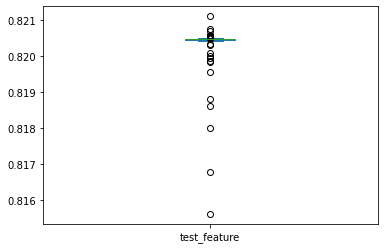

In [226]:
dfInsurance['test_feature'].plot(kind='box')

In [219]:
dfInsurance['test_feature'].describe()

count     10270.000000
mean     165858.530659
std        1948.282456
min           0.000000
25%      165671.011500
50%      165867.514000
75%      166080.751500
max      177556.314000
Name: test_feature, dtype: float64

In [30]:
dfInsurance = dfInsurance.loc[dfInsurance['amt_cmv'] > -75000]

#### Claims Rate

Text(0.5, 0.98, 'Claims Rate')

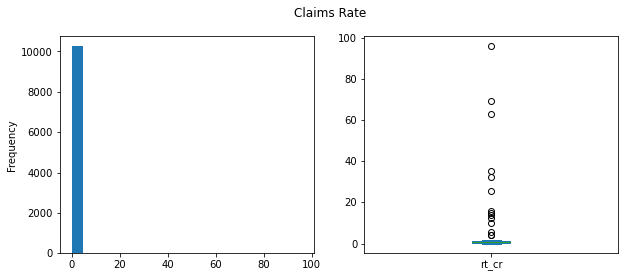

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
dfInsurance['rt_cr'].plot(kind='hist', bins=20, ax=axes[0])
dfInsurance['rt_cr'].plot(kind='box', ax=axes[1])
plt.suptitle("Claims Rate")


In [230]:
dfInsurance.loc[dfInsurance['rt_cr'] > 2]

,cod_cust_id,dt_fpy,atr_cust_age,dsc_edu_deg,amt_gms,atr_gla,flg_children,amt_cmv,rt_cr,amt_plob_motor,...,rt_plob_health,rt_plob_wcomp,fe_bin_plob_motor,fe_bin_plob_life,fe_bin_plob_health,fe_bin_plob_wcomp,fe_bin_plob_household,fe_cmv_cr_quadrant_Type1,fe_cmv_cr_quadrant_Type2,test_feature
51,52,1982,50,3 - BSc/MSc,6467.0,4,1,-14714.0800,25.360000,557.44,...,0.049022,-0.014925,A,H,D,NEGATIVES,F,Q4,Q1,0.819569
112,113,1997,37,4 - PhD,4707.0,1,1,-8719.0425,15.650000,518.32,...,0.094195,0.018350,A,H,C,D,G,Q4,Q1,0.819941
135,136,1997,28,3 - BSc/MSc,4352.0,4,1,-10198.9120,14.800000,297.61,...,0.194455,-0.004069,B,A,B,NEGATIVES,D,Q4,Q1,0.819851
171,172,1990,27,3 - BSc/MSc,2172.0,4,1,-165680.4240,256.200000,378.07,...,0.256979,0.028423,B,H,A,D,F,Q4,Q1,NaN
651,654,1974,53,2 - High School,6558.0,3,0,-64891.0000,96.000000,410.30,...,0.139646,0.033040,A,D,B,C,E,Q4,Q1,0.815612
671,674,1994,79,4 - PhD,8870.0,1,1,-52382.7600,63.000000,197.48,...,0.327941,0.045401,C,D,A,C,C,Q4,Q1,0.816776
703,706,1991,25,3 - BSc/MSc,3267.0,1,0,-28945.4000,35.000000,175.70,...,0.346097,0.019857,C,D,A,D,C,Q4,Q1,0.818615
754,757,1988,24,2 - High School,2233.0,1,0,-10107.3720,12.600000,193.37,...,0.318626,0.054339,C,G,A,B,C,Q4,Q1,0.819856
787,791,1980,33,3 - BSc/MSc,2739.0,3,1,-7851.1720,13.900000,127.58,...,0.656705,0.021065,D,F,A,D,F,Q4,Q1,0.819994
911,915,1986,64,3 - BSc/MSc,6710.0,4,1,-26130.4520,32.300000,135.58,...,0.265958,0.120054,D,B,A,A,C,Q4,Q1,0.818813


#### Premiums Motor

Text(0.5, 0.98, 'Motor premiums')

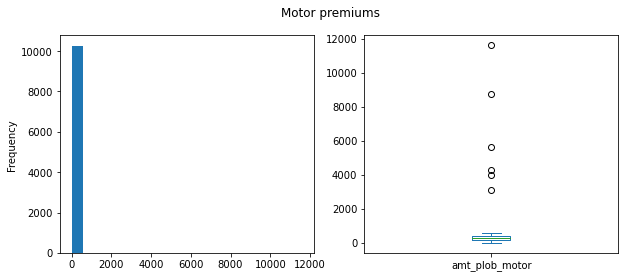

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
dfInsurance['amt_plob_motor'].plot(kind='hist', bins=20, ax=axes[0])
dfInsurance['amt_plob_motor'].plot(kind='box', ax=axes[1])
plt.suptitle("Motor premiums")


#### Premiums household

Text(0.5, 0.98, 'Household premiums')

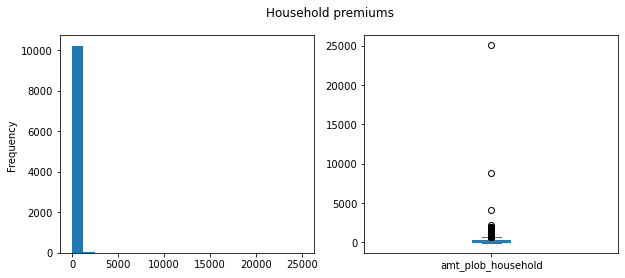

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
dfInsurance['amt_plob_household'].plot(kind='hist', bins=20, ax=axes[0])
dfInsurance['amt_plob_household'].plot(kind='box', ax=axes[1])
plt.suptitle("Household premiums")


In [203]:
dfInsurance.loc[dfInsurance['amt_plob_household'] > 20000]

,dt_fpy,atr_cust_age,dsc_edu_deg,amt_gms,atr_gla,flg_children,amt_cmv,rt_cr,amt_plob_motor,amt_plob_household,...,rt_plob_wcomp,Set,fe_bin_plob_motor,fe_bin_plob_life,fe_bin_plob_health,fe_bin_plob_wcomp,fe_bin_plob_household,fe_cmv_cr_quadrant_Type1,fe_cmv_cr_quadrant_Type2,age_binned
8863,1978.0,44.0,3 - BSc/MSc,5236.0,4.0,0.0,473.54,0.980537,508.43,25048.8,...,0.000464,train,A,G,D,D,A,Q2,Q1,"(33.0, 48.0]"


#### Premiums health

Text(0.5, 0.98, 'Health premiums')

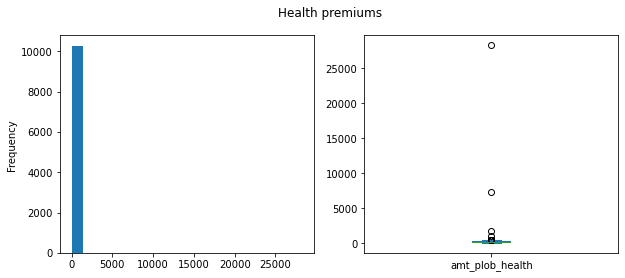

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
dfInsurance['amt_plob_health'].plot(kind='hist', bins=20, ax=axes[0])
dfInsurance['amt_plob_health'].plot(kind='box', ax=axes[1])
plt.suptitle("Health premiums")


In [176]:
dfInsurance.loc[dfInsurance['amt_plob_health'] > 25000]

,dt_fpy,atr_cust_age,dsc_edu_deg,amt_gms,atr_gla,flg_children,amt_cmv,rt_cr,amt_plob_motor,amt_plob_household,...,rt_plob_wcomp,Set,fe_bin_plob_motor,fe_bin_plob_life,fe_bin_plob_health,fe_bin_plob_wcomp,fe_bin_plob_household,fe_cmv_cr_quadrant_Type1,fe_cmv_cr_quadrant_Type2,age_binned
9146,1985.0,22.0,3 - BSc/MSc,1974.0,3.0,1.0,804.05,0.971735,26.34,829.05,...,0.004713,train,E,C,A,A,A,Q2,Q1,"(14.999, 33.0]"


#### Premiums life

Text(0.5, 0.98, 'Life premiums')

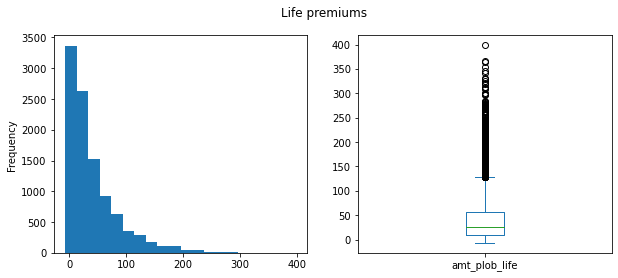

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
dfInsurance['amt_plob_life'].plot(kind='hist', bins=20, ax=axes[0])
dfInsurance['amt_plob_life'].plot(kind='box', ax=axes[1])
plt.suptitle("Life premiums")


#### Premiums Work Compensation

Text(0.5, 0.98, 'Work Compensation premiums')

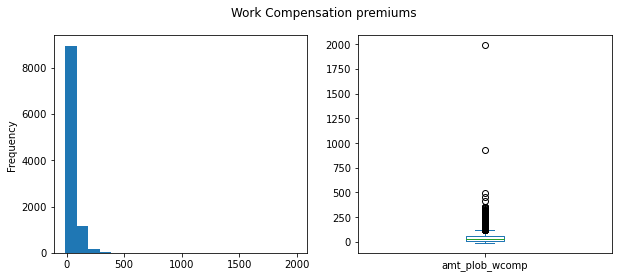

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
dfInsurance['amt_plob_wcomp'].plot(kind='hist', bins=20, ax=axes[0])
dfInsurance['amt_plob_wcomp'].plot(kind='box', ax=axes[1])
plt.suptitle("Work Compensation premiums")


In [204]:
dfInsurance.loc[dfInsurance['amt_plob_wcomp'] > 750]

,dt_fpy,atr_cust_age,dsc_edu_deg,amt_gms,atr_gla,flg_children,amt_cmv,rt_cr,amt_plob_motor,amt_plob_household,...,rt_plob_wcomp,Set,fe_bin_plob_motor,fe_bin_plob_life,fe_bin_plob_health,fe_bin_plob_wcomp,fe_bin_plob_household,fe_cmv_cr_quadrant_Type1,fe_cmv_cr_quadrant_Type2,age_binned
5084,1994.0,57.0,2 - High School,6659.0,3.0,0.0,2314.21,0.135528,350.51,201.7,...,0.734939,train,B,D,B,A,D,Q2,Q2,"(48.0, 63.0]"


## Geographic location area

In [38]:
#lim_sup, lim_inf = interquartile_range(dfInsurance['amt_cmv'])

#plt.figure(figsize=(10, 8));
#sns.barplot(x='dsc_edu_deg', y='amt_cmv', data=dfInsurance.loc[(dfInsurance['amt_cmv'] < lim_sup) & (dfInsurance['amt_cmv'] > lim_inf)], ci=None, palette='tab10');
#plt.xlabel('Educational Degree', fontsize=16);
#plt.ylabel## Geographic location area('Customer Monetary Value', fontsize=16);
#plt.title('Customer Monetary Value vs Educational Degree', fontsize= 18);

#### Customer Monetary Value

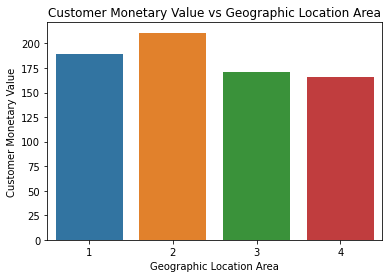

In [121]:
plt.figure(figsize=(6, 4));
sns.barplot(x='atr_gla', y='amt_cmv', data=dfInsurance, ci=None, palette='tab10');
plt.xlabel('Geographic Location Area', fontsize=10);
plt.ylabel('Customer Monetary Value', fontsize=10);
plt.title('Customer Monetary Value vs Geographic Location Area', fontsize= 12);

#### Claims rate

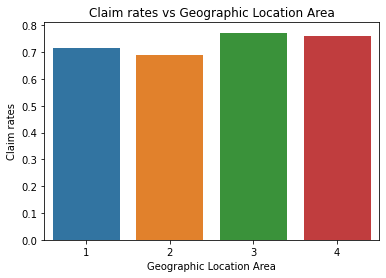

In [90]:
plt.figure(figsize=(6, 4));
sns.barplot(x='atr_gla', y='rt_cr', data=dfInsurance, ci=None, palette='tab10');
plt.xlabel('Geographic Location Area', fontsize=10);
plt.ylabel('Claim rates', fontsize=10);
plt.title('Claim rates vs Geographic Location Area', fontsize= 12);

#### Gross Monthly Salary

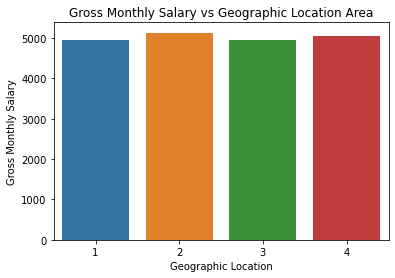

In [214]:
plt.figure(figsize=(6, 4));
sns.barplot(x='atr_gla', y='amt_gms', data=dfInsurance, ci=None, palette='tab10');
plt.xlabel('Geographic Location', fontsize=10);
plt.ylabel('Gross Monthly Salary', fontsize=10);
plt.title('Gross Monthly Salary vs Geographic Location Area', fontsize= 12);

#### Total premium

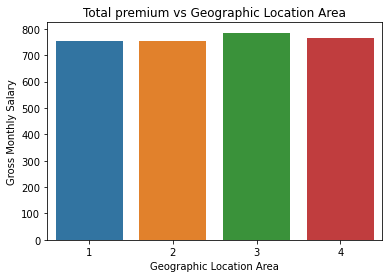

In [93]:
plt.figure(figsize=(6, 4));
sns.barplot(x='atr_gla', y='amt_premium_total', data=dfInsurance, ci=None, palette='tab10');
plt.xlabel('Geographic Location Area', fontsize=10);
plt.ylabel('Gross Monthly Salary', fontsize=10);
plt.title('Total premium vs Geographic Location Area', fontsize= 12);

#### Motor premium

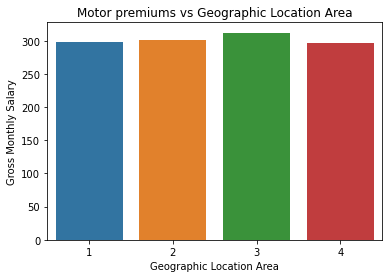

In [84]:
plt.figure(figsize=(6, 4));
sns.barplot(x='atr_gla', y='amt_plob_motor', data=dfInsurance, ci=None, palette='tab10');
plt.xlabel('Geographic Location Area', fontsize=10);
plt.ylabel('Gross Monthly Salary', fontsize=10);
plt.title('Motor premiums vs Geographic Location Area', fontsize= 12);

#### Household premium

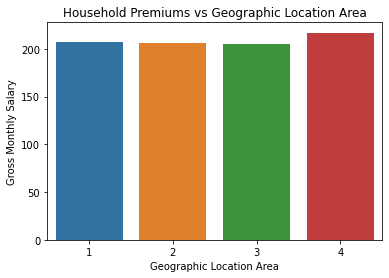

In [100]:
plt.figure(figsize=(6, 4));
sns.barplot(x='atr_gla', y='amt_plob_household', data=dfInsurance, ci=None, palette='tab10');
plt.xlabel('Geographic Location Area', fontsize=10);
plt.ylabel('Gross Monthly Salary', fontsize=10);
plt.title('Household Premiums vs Geographic Location Area', fontsize= 12);

#### Health premium

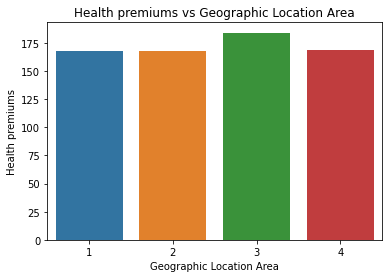

In [99]:
plt.figure(figsize=(6, 4));
sns.barplot(x='atr_gla', y='amt_plob_health', data=dfInsurance, ci=None, palette='tab10');
plt.xlabel('Geographic Location Area', fontsize=10);
plt.ylabel('Health premiums', fontsize=10);
plt.title('Health premiums vs Geographic Location Area', fontsize= 12);

#### Life premium

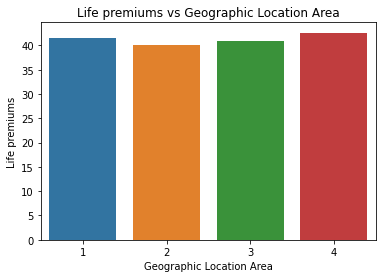

In [98]:
plt.figure(figsize=(6, 4));
sns.barplot(x='atr_gla', y='amt_plob_life', data=dfInsurance, ci=None, palette='tab10');
plt.xlabel('Geographic Location Area', fontsize=10);
plt.ylabel('Life premiums', fontsize=10);
plt.title('Life premiums vs Geographic Location Area', fontsize= 12);

#### Work compensation premium

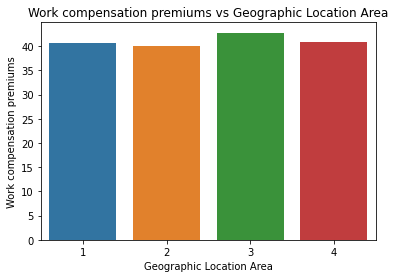

In [97]:
plt.figure(figsize=(6, 4));
sns.barplot(x='atr_gla', y='amt_plob_wcomp', data=dfInsurance, ci=None, palette='tab10');
plt.xlabel('Geographic Location Area', fontsize=10);
plt.ylabel('Work compensation premiums', fontsize=10);
plt.title('Work compensation premiums vs Geographic Location Area', fontsize= 12);

## Educational degree

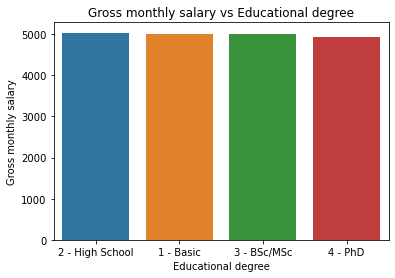

In [108]:
plt.figure(figsize=(6, 4));
sns.barplot(x='dsc_edu_deg', y='amt_gms', data=dfInsurance, ci=None, palette='tab10');
plt.xlabel('Educational degree', fontsize=10);
plt.ylabel('Gross monthly salary', fontsize=10);
plt.title('Gross monthly salary vs Educational degree', fontsize= 12);

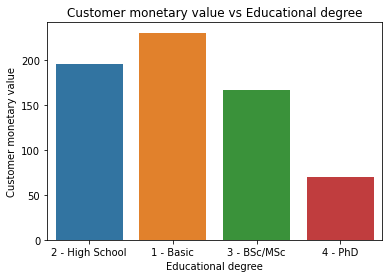

In [109]:
plt.figure(figsize=(6, 4));
sns.barplot(x='dsc_edu_deg', y='amt_cmv', data=dfInsurance, ci=None, palette='tab10');
plt.xlabel('Educational degree', fontsize=10);
plt.ylabel('Customer monetary value', fontsize=10);
plt.title('Customer monetary value vs Educational degree', fontsize= 12);

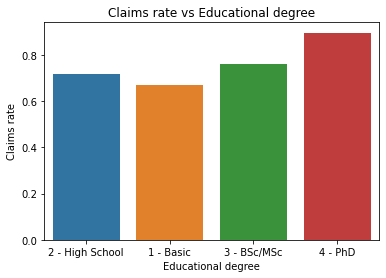

In [110]:
plt.figure(figsize=(6, 4));
sns.barplot(x='dsc_edu_deg', y='rt_cr', data=dfInsurance, ci=None, palette='tab10');
plt.xlabel('Educational degree', fontsize=10);
plt.ylabel('Claims rate', fontsize=10);
plt.title('Claims rate vs Educational degree', fontsize= 12);

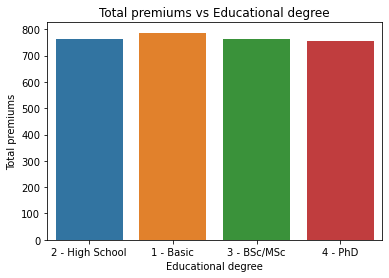

In [112]:
plt.figure(figsize=(6, 4));
sns.barplot(x='dsc_edu_deg', y='amt_premium_total', data=dfInsurance, ci=None, palette='tab10');
plt.xlabel('Educational degree', fontsize=10);
plt.ylabel('Total premiums', fontsize=10);
plt.title('Total premiums vs Educational degree', fontsize= 12);

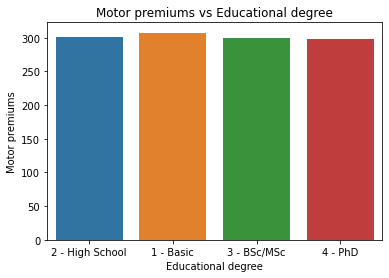

In [113]:
plt.figure(figsize=(6, 4));
sns.barplot(x='dsc_edu_deg', y='amt_plob_motor', data=dfInsurance, ci=None, palette='tab10');
plt.xlabel('Educational degree', fontsize=10);
plt.ylabel('Motor premiums', fontsize=10);
plt.title('Motor premiums vs Educational degree', fontsize= 12);

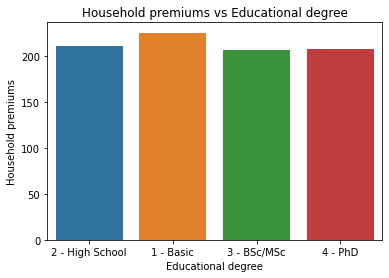

In [114]:
plt.figure(figsize=(6, 4));
sns.barplot(x='dsc_edu_deg', y='amt_plob_household', data=dfInsurance, ci=None, palette='tab10');
plt.xlabel('Educational degree', fontsize=10);
plt.ylabel('Household premiums', fontsize=10);
plt.title('Household premiums vs Educational degree', fontsize= 12);

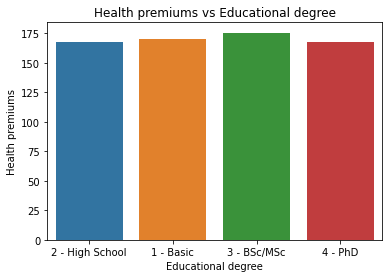

In [116]:
plt.figure(figsize=(6, 4));
sns.barplot(x='dsc_edu_deg', y='amt_plob_health', data=dfInsurance, ci=None, palette='tab10');
plt.xlabel('Educational degree', fontsize=10);
plt.ylabel('Health premiums', fontsize=10);
plt.title('Health premiums vs Educational degree', fontsize= 12);

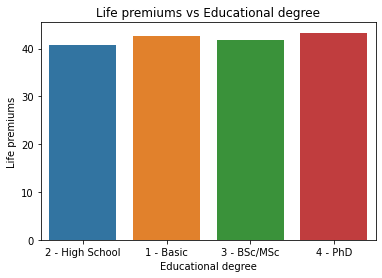

In [115]:
plt.figure(figsize=(6, 4));
sns.barplot(x='dsc_edu_deg', y='amt_plob_life', data=dfInsurance, ci=None, palette='tab10');
plt.xlabel('Educational degree', fontsize=10);
plt.ylabel('Life premiums', fontsize=10);
plt.title('Life premiums vs Educational degree', fontsize= 12);

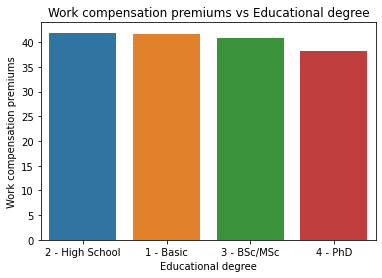

In [117]:
plt.figure(figsize=(6, 4));
sns.barplot(x='dsc_edu_deg', y='amt_plob_wcomp', data=dfInsurance, ci=None, palette='tab10');
plt.xlabel('Educational degree', fontsize=10);
plt.ylabel('Work compensation premiums', fontsize=10);
plt.title('Work compensation premiums vs Educational degree', fontsize= 12);

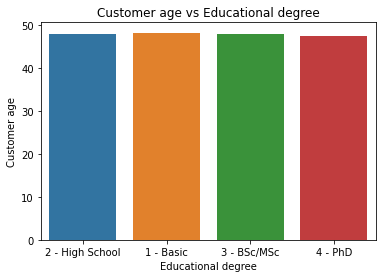

In [122]:
plt.figure(figsize=(6, 4));
sns.barplot(x='dsc_edu_deg', y='atr_cust_age', data=dfInsurance, ci=None, palette='tab10');
plt.xlabel('Educational degree', fontsize=10);
plt.ylabel('Customer age', fontsize=10);
plt.title('Customer age vs Educational degree', fontsize= 12);

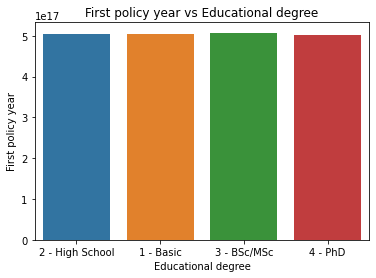

In [125]:
plt.figure(figsize=(6, 4));
sns.barplot(x='dsc_edu_deg', y='dt_fpy', data=dfInsurance, ci=None, palette='tab10');
plt.xlabel('Educational degree', fontsize=10);
plt.ylabel('First policy year', fontsize=10);
plt.title('First policy year vs Educational degree', fontsize= 12);

In [134]:
dfInsurance.head()

,cod_cust_id,dt_fpy,atr_cust_age,dsc_edu_deg,amt_gms,atr_gla,flg_children,amt_cmv,rt_cr,amt_plob_motor,...,rt_plob_motor,rt_plob_health,rt_plob_wcomp,fe_bin_plob_motor,fe_bin_plob_life,fe_bin_plob_health,fe_bin_plob_wcomp,fe_bin_plob_household,fe_cmv_cr_quadrant_Type1,fe_cmv_cr_quadrant_Type2
0,1,1985,34,2 - High School,4354.0,1,1,380.97,0.390032,375.85,...,0.564712,0.219905,0.025377,B,D,B,D,F,Q2,Q3
1,2,1981,21,2 - High School,1353.0,4,1,-131.13,1.116503,77.46,...,0.085031,0.128096,0.116503,E,A,B,A,B,Q4,Q4
2,3,1991,46,1 - Basic,4554.0,3,0,504.67,0.284810,206.15,...,0.278355,0.168215,0.133702,C,C,B,A,D,Q2,Q3
3,4,1990,35,3 - BSc/MSc,2197.0,4,1,-16.99,0.986665,182.48,...,0.303789,0.518030,0.047180,C,E,A,C,F,Q2,Q4
4,5,1986,43,3 - BSc/MSc,3526.0,4,1,35.23,0.904281,338.62,...,0.538141,0.290175,0.065873,B,F,A,C,F,Q2,Q4


In [171]:
def scatterplots_views(columnName):
    
    lim_sup, lim_inf = interquartile_range(dfInsurance[columnName])

    fig, axes = plt.subplots(3, 2, figsize=(15,12))
    #educational degree
    sns.scatterplot(x='atr_cust_age', y=columnName, hue='dsc_edu_deg', data=dfInsurance.loc[(dfInsurance[columnName] < lim_sup) & (dfInsurance[columnName] > lim_inf)], ax=axes[0,0])
    sns.scatterplot(x='atr_cust_age', y=columnName, hue='dsc_edu_deg', data=dfInsurance.loc[~(dfInsurance[columnName] < lim_sup) & (dfInsurance[columnName] > lim_inf)], ax=axes[0,1])

    #geographic location
    sns.scatterplot(x='atr_cust_age', y=columnName, hue='atr_gla', data=dfInsurance.loc[(dfInsurance[columnName] < lim_sup) & (dfInsurance[columnName] > lim_inf)], ax=axes[1,0])
    sns.scatterplot(x='atr_cust_age', y=columnName, hue='atr_gla', data=dfInsurance.loc[~(dfInsurance[columnName] < lim_sup) & (dfInsurance[columnName] > lim_inf)], ax=axes[1,1])

    #children
    sns.scatterplot(x='atr_cust_age', y=columnName, hue='flg_children', data=dfInsurance.loc[(dfInsurance[columnName] < lim_sup) & (dfInsurance[columnName] > lim_inf)], ax=axes[2,0])
    sns.scatterplot(x='atr_cust_age', y=columnName, hue='flg_children', data=dfInsurance.loc[~(dfInsurance[columnName] < lim_sup) & (dfInsurance[columnName] > lim_inf)], ax=axes[2,1])

    

## Customer monetary value

In [153]:
negative_cmv = dfInsurance.loc[dfInsurance['amt_cmv'] < 0]
positive_cmv = dfInsurance.loc[dfInsurance['amt_cmv'] > 0]


#### Gross monthly salary

<AxesSubplot:xlabel='amt_gms', ylabel='amt_cmv'>

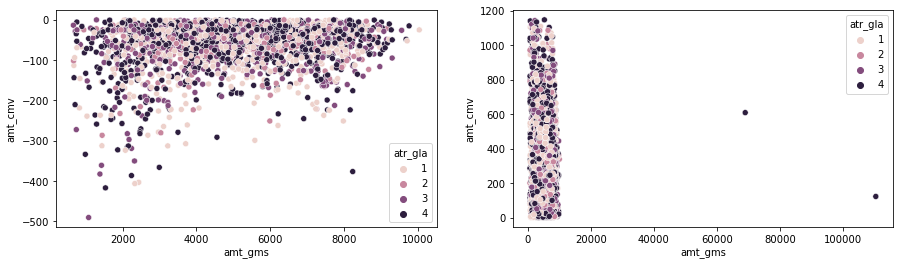

In [179]:
fig, axes = plt.subplots(1, 2, figsize=(15,4))
#educational degree
sns.scatterplot(x='amt_gms', y='amt_cmv', hue='atr_gla', data=negative_cmv.loc[~negative_cmv['outlier_candidate'].str.contains('amt_cmv', na=False)], ax=axes[0])
sns.scatterplot(x='amt_gms', y='amt_cmv', hue='atr_gla## Customer monetary value', data=positive_cmv.loc[~positive_cmv['outlier_candidate'].str.contains('amt_cmv', na=False)], ax=axes[1])

#### Claim rate

<AxesSubplot:xlabel='rt_cr', ylabel='amt_cmv'>

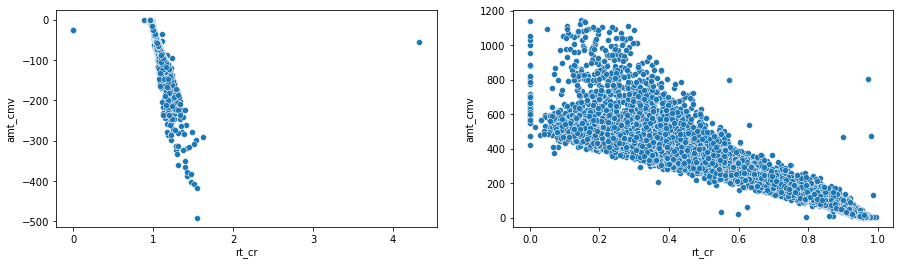

In [184]:
fig, axes = plt.subplots(1, 2, figsize=(15,4))
#educational degree
sns.scatterplot(x='rt_cr', y='amt_cmv', data=negative_cmv.loc[~negative_cmv['outlier_candidate'].str.contains('amt_cmv', na=False)], ax=axes[0])
sns.scatterplot(x='rt_cr', y='amt_cmv', data=positive_cmv.loc[~positive_cmv['outlier_candidate'].str.contains('amt_cmv', na=False)], ax=axes[1])

#### Total premiums

<AxesSubplot:xlabel='amt_premium_total', ylabel='amt_cmv'>

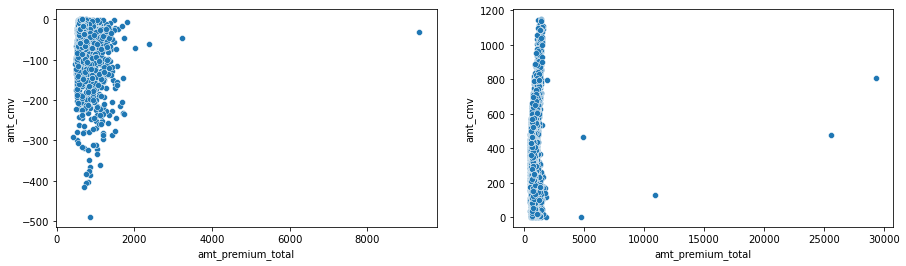

In [188]:
fig, axes = plt.subplots(1, 2, figsize=(15,4))
#educational degree
sns.scatterplot(x='amt_premium_total', y='amt_cmv', data=negative_cmv.loc[~negative_cmv['outlier_candidate'].str.contains('amt_cmv', na=False)], ax=axes[0])
sns.scatterplot(x='amt_premium_total', y='amt_cmv', data=positive_cmv.loc[~positive_cmv['outlier_candidate'].str.contains('amt_cmv', na=False)], ax=axes[1])

#### Motor premiums

<AxesSubplot:xlabel='amt_plob_motor', ylabel='amt_cmv'>

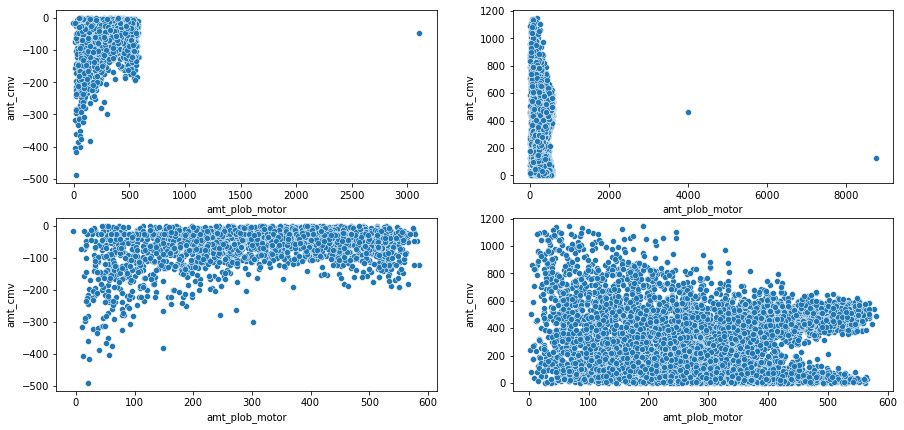

In [204]:
fig, axes = plt.subplots(2, 2, figsize=(15,7))
#educational degree
sns.scatterplot(x='amt_plob_motor', y='amt_cmv', data=negative_cmv.loc[~negative_cmv['outlier_candidate'].str.contains('amt_cmv', na=False)], ax=axes[0,0])
sns.scatterplot(x='amt_plob_motor', y='amt_cmv', data=positive_cmv.loc[~positive_cmv['outlier_candidate'].str.contains('amt_cmv', na=False)], ax=axes[0,1])

sns.scatterplot(x='amt_plob_motor', y='amt_cmv', data=negative_cmv.loc[~negative_cmv['outlier_candidate'].str.contains('amt_cmv|amt_plob_motor', na=False)], ax=axes[1,0])
sns.scatterplot(x='amt_plob_motor', y='amt_cmv', data=positive_cmv.loc[~positive_cmv['outlier_candidate'].str.contains('amt_cmv|amt_plob_motor', na=False)], ax=axes[1,1])

#### Household premiums

<AxesSubplot:xlabel='amt_plob_household', ylabel='amt_cmv'>

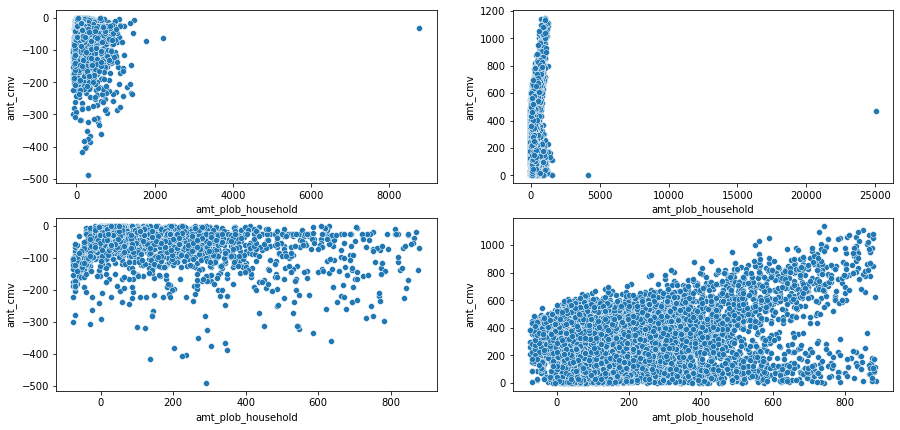

In [213]:
fig, axes = plt.subplots(2, 2, figsize=(15,7))
#educational degree
sns.scatterplot(x='amt_plob_household', y='amt_cmv', data=negative_cmv.loc[~negative_cmv['outlier_candidate'].str.contains('amt_cmv', na=False)], ax=axes[0,0])
sns.scatterplot(x='amt_plob_household', y='amt_cmv', data=positive_cmv.loc[~positive_cmv['outlier_candidate'].str.contains('amt_cmv', na=False)], ax=axes[0,1])

sns.scatterplot(x='amt_plob_household', y='amt_cmv', data=negative_cmv.loc[~negative_cmv['outlier_candidate'].str.contains('amt_cmv|amt_plob_household', na=False)], ax=axes[1,0])
sns.scatterplot(x='amt_plob_household', y='amt_cmv', data=positive_cmv.loc[~positive_cmv['outlier_candidate'].str.contains('amt_cmv|amt_plob_household', na=False)], ax=axes[1,1])

#### Health premiums

<AxesSubplot:xlabel='amt_plob_health', ylabel='amt_cmv'>

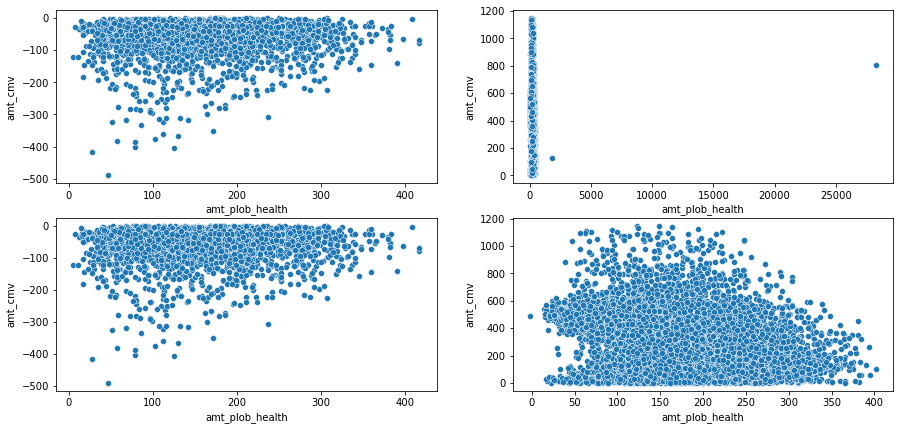

In [206]:
fig, axes = plt.subplots(2, 2, figsize=(15,7))
#educational degree
sns.scatterplot(x='amt_plob_health', y='amt_cmv', data=negative_cmv.loc[~negative_cmv['outlier_candidate'].str.contains('amt_cmv', na=False)], ax=axes[0,0])
sns.scatterplot(x='amt_plob_health', y='amt_cmv', data=positive_cmv.loc[~positive_cmv['outlier_candidate'].str.contains('amt_cmv', na=False)], ax=axes[0,1])

sns.scatterplot(x='amt_plob_health', y='amt_cmv', data=negative_cmv.loc[~negative_cmv['outlier_candidate'].str.contains('amt_cmv|amt_plob_health', na=False)], ax=axes[1,0])
sns.scatterplot(x='amt_plob_health', y='amt_cmv', data=positive_cmv.loc[~positive_cmv['outlier_candidate'].str.contains('amt_cmv|amt_plob_health', na=False)], ax=axes[1,1])

#### Life premiums

<AxesSubplot:xlabel='amt_plob_life', ylabel='amt_cmv'>

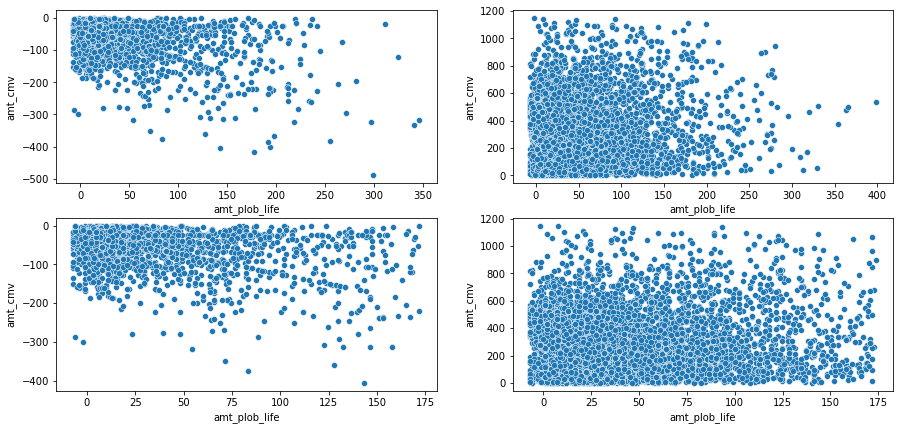

In [211]:
fig, axes = plt.subplots(2, 2, figsize=(15,7))
#educational degree
sns.scatterplot(x='amt_plob_life', y='amt_cmv', data=negative_cmv.loc[~negative_cmv['outlier_candidate'].str.contains('amt_cmv', na=False)], ax=axes[0,0])
sns.scatterplot(x='amt_plob_life', y='amt_cmv', data=positive_cmv.loc[~positive_cmv['outlier_candidate'].str.contains('amt_cmv', na=False)], ax=axes[0,1])

sns.scatterplot(x='amt_plob_life', y='amt_cmv', data=negative_cmv.loc[~negative_cmv['outlier_candidate'].str.contains('amt_cmv|amt_plob_life', na=False)], ax=axes[1,0])
sns.scatterplot(x='amt_plob_life', y='amt_cmv', data=positive_cmv.loc[~positive_cmv['outlier_candidate'].str.contains('amt_cmv|amt_plob_life', na=False)], ax=axes[1,1])

#### Work compensation premiums

<AxesSubplot:xlabel='amt_plob_wcomp', ylabel='amt_cmv'>

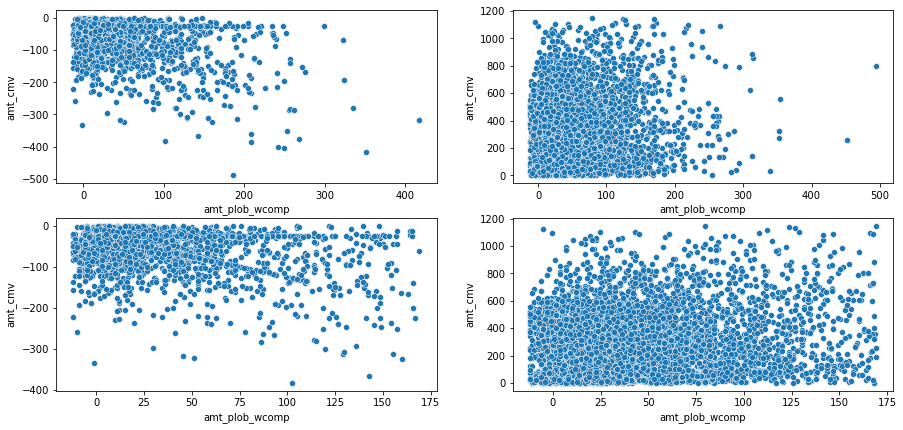

In [208]:
fig, axes = plt.subplots(2, 2, figsize=(15,7))
#educational degree
sns.scatterplot(x='amt_plob_wcomp', y='amt_cmv', data=negative_cmv.loc[~negative_cmv['outlier_candidate'].str.contains('amt_cmv', na=False)], ax=axes[0,0])
sns.scatterplot(x='amt_plob_wcomp', y='amt_cmv', data=positive_cmv.loc[~positive_cmv['outlier_candidate'].str.contains('amt_cmv', na=False)], ax=axes[0,1])

sns.scatterplot(x='amt_plob_wcomp', y='amt_cmv', data=negative_cmv.loc[~negative_cmv['outlier_candidate'].str.contains('amt_cmv|amt_plob_wcomp', na=False)], ax=axes[1,0])
sns.scatterplot(x='amt_plob_wcomp', y='amt_cmv', data=positive_cmv.loc[~positive_cmv['outlier_candidate'].str.contains('amt_cmv|amt_plob_wcomp', na=False)], ax=axes[1,1])

In [228]:
dfInsuranceA = dfInsurance.copy()

In [229]:
dfInsuranceA = dfInsurance.loc[~((dfInsurance['dt_fpy'] > 2022) | 
                        (dfInsurance['atr_cust_age'] > 100) | 
                        (dfInsurance['amt_cmv'] < -160000) |
                        (dfInsurance['amt_gms']> 15000) |
                        (dfInsurance['rt_cr'] > 2) |
                        (dfInsurance['amt_plob_motor'] > 2000)|
                        (dfInsurance['amt_plob_household'] > 5000)|
                        (dfInsurance['amt_plob_health'] > 5000)|
                        (dfInsurance['amt_plob_wcomp'] > 500)|
                        (dfInsurance['amt_premium_total'] > 5000))]

In [242]:
dfInsuranceA.isna().sum()

cod_cust_id                    0
dt_fpy                         0
atr_cust_age                   0
dsc_edu_deg                   17
amt_gms                        0
atr_gla                        0
flg_children                   0
amt_cmv                        0
rt_cr                          0
amt_plob_motor                 0
amt_plob_household             0
amt_plob_health                0
amt_plob_life                  0
amt_plob_wcomp                 0
atr_edu_deg                    0
outlier_candidate           9553
amt_premium_total              0
atr_fpy_to_date                0
rt_plob_life                   0
rt_plob_household              0
rt_plob_motor                  0
rt_plob_health                 0
rt_plob_wcomp                  0
fe_bin_plob_motor              0
fe_bin_plob_life               0
fe_bin_plob_health             0
fe_bin_plob_wcomp              0
fe_bin_plob_household          0
fe_cmv_cr_quadrant_Type1       0
fe_cmv_cr_quadrant_Type2       0
test_featu

In [241]:
#dfInsuranceA.dropna(subset=['amt_plob_wcomp'], axis= 0, inplace=True)
dfInsuranceA = dfInsuranceA[dfInsuranceA['amt_plob_wcomp'].notna()] 

<AxesSubplot:ylabel='Frequency'>

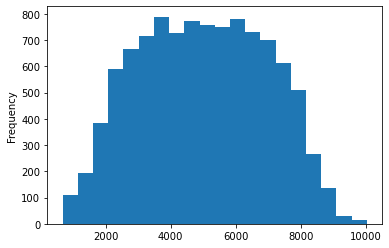

In [279]:
dfInsuranceA['amt_gms'].plot(kind='hist', bins=20)

<AxesSubplot:ylabel='Frequency'>

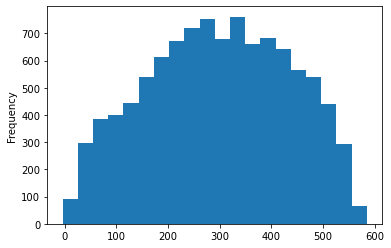

In [255]:
dfInsuranceA['amt_plob_motor'].plot(kind='hist', bins=20)

<AxesSubplot:ylabel='Frequency'>

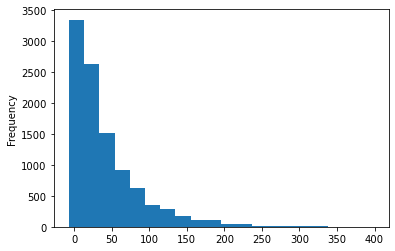

In [261]:
dfInsuranceA['amt_plob_life'].plot(kind='hist', bins=20)

<AxesSubplot:ylabel='Frequency'>

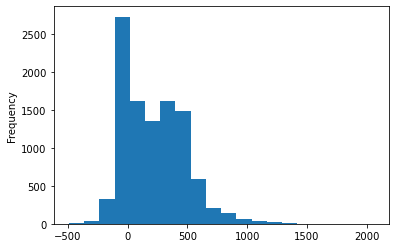

In [299]:
dfInsuranceA['amt_cmv'].plot(kind='hist', bins=20)

In [260]:
#dfInsuranceA['amt_plob_wcomp_log'].plot(kind='hist', bins=20)

premium life, household e work compensation com distribuições power law?

premium motor, health e gms com distribuição normal?

amt_cmv ???

# PCA

In [314]:
#Normalize features

#dfInsuranceA['sqrt_amt_cmv'] = np.sqrt(dfInsuranceA['amt_cmv'])

#dfInsuranceA['log_amt_plob_life'] = np.log(dfInsuranceA['amt_plob_life'] + 1) 
#dfInsuranceA['log_amt_plob_household'] = np.log(dfInsuranceA['amt_plob_household'] + 1) 
#dfInsuranceA['log_amt_plob_wcomp'] = np.log(dfInsuranceA['amt_plob_wcomp'] + 1)

dfInsurance['log_amt_cmv'] = dfInsurance['amt_cmv'] + 490.2
dfInsuranceA['log_amt_cmv'] = np.log(dfInsuranceA['log_amt_cmv'] + 1)

scaler = MinMaxScaler()
#dfInsuranceA['minmax_amt_plob_health'] = scaler.fit_transform(dfInsuranceA[['amt_plob_health']])
#dfInsuranceA['minmax_amt_plob_motor'] = scaler.fit_transform(dfInsuranceA[['amt_plob_motor']])
#dfInsuranceA['minmax_amt_gms'] = scaler.fit_transform(dfInsuranceA[['amt_gms']])

features_dataset = dfInsuranceA[['minmax_amt_plob_health', 'minmax_amt_plob_motor', 'minmax_amt_gms', 'log_amt_cmv', 'log_amt_plob_life', 'log_amt_plob_household', 'log_amt_plob_wcomp']]

C:\Users\PedroSantos\anaconda3\envs\dsacademy\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [312]:
dfInsuranceA['log_amt_cmv'].min()

-1.261126561892552

In [305]:
dfInsuranceA['amt_cmv'].head()

0    380.97
1   -131.13
2    504.67
3    -16.99
4     35.23
Name: amt_cmv, dtype: float64

In [304]:
features_dataset.head()

,minmax_amt_plob_health,minmax_amt_plob_motor,minmax_amt_gms,log_amt_cmv,log_amt_plob_life,log_amt_plob_household,log_amt_plob_wcomp
0,0.333663,0.644732,0.393409,5.945342,3.871409,4.387636,2.884242
1,0.266984,0.138411,0.073371,NaN,5.275458,6.033566,4.674043
2,0.284716,0.356778,0.414738,6.225884,4.469923,5.418320,4.605370
3,0.704047,0.316614,0.163378,NaN,3.592919,3.792113,3.378952
4,0.415084,0.581559,0.305108,3.589888,2.984671,3.887730,3.748327


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])



[[ 239.79528431 2739.76743078  221.40309259  306.0787139    60.95346651
    61.32278357]
 [ 211.60792458 5043.47167661  375.7232892   127.52045578   25.36759848
    26.37740966]
 [ 204.5383349  7306.55780908  286.18073302  195.9470579    37.61139218
    38.60606072]]


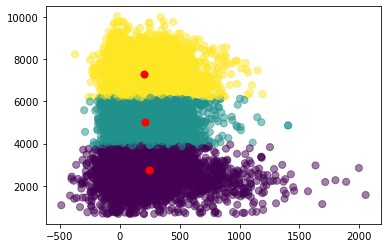

In [243]:
df = dfInsuranceA[['amt_cmv','amt_gms','amt_plob_motor', 'amt_plob_household', 'amt_plob_wcomp', 'amt_plob_life']]
  
kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['amt_cmv'], df['amt_gms'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()